<div style="background-color: #88ffee; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

# HW 08: Singular Value Decomposition & Principal Component Analysis


Belieu, Joshua, Alan



### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**

####  Learning Objectives:
* Understand the mathematical foundations of SVD and PCA
* Apply dimensionality reduction techniques to real-world datasets
* Visualize high-dimensional data in lower dimensions
* Interpret results and explain variance explained by principal components

---

<div style="background-color: #e8f5e9; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 1: Lightning Questions about Linear Algebra (10)



Answer these questions, using $\LaTeX$ and markdown where needed:

* What rank is the identity matrix $I$? 
* If we multiply a matrix $A$ by a diagonal matrix $D$ from the left ($DA$), what does it do to the matrix? What if we multiply a matrix by a diagonal marix from the right ($AD$), what does that do? Use these two observations to give two interpretations of SVD (i.e., $U\Sigma$ and $\Sigma V^\mathsf{T}$).
* If we write our data matrix $X$ in terms of its SVD and set some of the SVs (singular values) to zero, do we change the size and shape of $X$? What exactly are we doing? 
* When we do PCA, we need a new data matrix $X'$ that is _smaller_ - we are doing dimensionality reduction. How do we make this smaller matrix? Do we just drop columns in $X$?!
* I am often very sloppy when I say that $C = X^TX$ is the correlation matrix. In what three ways might this be misleading/incorrect? 
* Suppose we have a square matrix. How are its eigenvalues related to its SVs?
* Explain explained variance. Is there a connection to the SVs in some way?
* What is the Kaiser criterion and how does it compare to elbow? 

In the order that the questions are asked,

* the rank is the dimension of the matrix, full rank.
* If D is diagonal then when we left multiply with A we will get $DA=d_ia_ij$, or, the values on the diagonal weight columns of A from the left. A similar argument is given for right multiplication: $AD=a_ijd_j$. $U\Sigma$ can be intrepreted then as a matrix of eigenvectors weighted column-wise by their associated eigenvalues. Likewise for $\Sigma V^T$.
* The dimension does not change but we change the rank of the represented matrix (and the matrix's content).
* More robust schemes can be employed but what one can typically do is truncate the decomposed matrix which is not changing X itself. For instance,

$$
X\in \mathbb{R}^{m\times n}\implies X=U\Sigma V^T,\quad U\in \mathbb{R}^{m\times m},V^T\in \mathbb{R}^{n\times n},\Sigma\in \mathbb{R}^{m\times n}
$$

If we truncate $V^T$ by taking only $i$ columns then,

$$
X'\equiv U\Sigma V^T_i=U\Sigma V^TV^T_i=XV^T_i,\quad V^T\in\mathbb{R}^{n\times i}
$$

* We have not; normalized the dataset, implemented variations between features, or mean-centered the data.
* Singular values must be greater than zero so if the matrix is square and SPD then the eigenvalues are the singular values. If not SPD (SND) then the eigenvalues are not strictly the singular values unless you form $S^TS$.
* Explained variance is a metric that describes a feature's ability to capture variation within the dataset. It is found by considering the eigenvalue problem from the perspective of the SVD decomposition. When performing a projection of a matrix onto it's right singular vectors it maps to the singular values and left singular vectors. The variation of that transformation leaves only the square of the singular value due to the singular vectors' unitary property.
* Kaiser Critertion : Critertion for keeping components of a PCA where we only keep components with eigenvalues larger than 1. This feels more rigorous than the elbow method but is also less graphical and intuitive.

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 2: Interpolation "_By Hand_" with the Normal Equation (10)



In this course you have learned three ways of doing linear regression:
1. by hand: solving $N$ equations in $N$ unknowns for the weights; this was only practical for a very small number of weights
2. optimization: we can cast finding the weights as the minimization of a loss function $L({\bf w})$ that depends on the weights 
3. by inverting a matrix for the case of a square matrix (which is "interpolation")

The third way is generalized to non-square matrices through the use of the Moore-Penrose pseudoinverse $X^+$. 

Begin with the Moore-Penrose pseudoinverse expression for linear regression. That is, write down the **Normal Equation**, which looks unlike the other ways we have approached linear regression! You will make them look the same here! 

You are given two data points $(x_1, y_1)$ and $(x_2, y_2)$ and a model $y = w_0 + w_1x$.  First write down the expressions for $w_0$ and $w_1$ in terms of the data, using $\LaTeX$. You have done this before, so don't spend too much time on this - go find it! I want you to have the equations here in front of you. 

Next show **all** of the math steps to derive the weights from the **Normal Equation**. That is, in the **Normal Equation** write down what ${\bf y}$ is, what $X$ is, what $X^TX$ is and so on. Do all steps by hand in $\LaTeX$. One you have the vector ${\bf w}$ separate it into $w_0$ and $w_1$ and compare to what you got with the more direct way. 

Recall that I showed in class that the inverse of a $2\times 2$ matrix can be done analytically and I gave the expression in the slides.

Does the **Normal Equation** yield the same expressions for $w_0$ and $w_1$ as you obtained by solving two equations in two unknowns? Why or why not? 

write down the **Normal Equation** :

$$
\textbf{w}=(X^TX)^{-1}X^T\textbf{y}
$$

write down the expressions for $w_0$ and $w_1$ : 

From homework 6 :

$$
w_1=\frac{\langle X\rangle\langle Y\rangle-\langle XY\rangle}{\langle X\rangle^2-\langle X^2\rangle}=\frac{-\langle X\rangle\langle Y\rangle+\langle XY\rangle}{\text{Cov}[X,X]}=\frac{\text{Cov}[X,Y]}{\text{Cov}[X,X]}
$$

In the language of the current problem,

$$
\langle X\rangle = \frac{x_1 + x_2}{2}, \quad\langle Y\rangle = \frac{y_1 + y_2}{2}, \quad\langle XY\rangle = \frac{x_1 y_1 + x_2 y_2}{2}, \quad\langle X^2\rangle = \frac{x_1^2 + x_2^2}{2}.
$$

$$
\implies w_1=\frac{ \tfrac{1}{2}(x_1 y_1 + x_2 y_2)- \tfrac{1}{4}(x_1 + x_2)(y_1 + y_2)}{ \tfrac{1}{2}(x_1^2 + x_2^2)- \tfrac{1}{4}(x_1 + x_2)^2 }.
$$

Futzing with the numerator and denominator separately,

$$
\text{Numerator}= \frac{1}{2}(x_1 y_1 + x_2 y_2)- \frac{1}{4}(x_1 y_1 + x_1 y_2 + x_2 y_1 + x_2 y_2)= \frac{1}{4}(2x_1 y_1 + 2x_2 y_2 - x_1 y_1 - x_1 y_2 - x_2 y_1 - x_2 y_2)= \frac{1}{4}(x_1 y_1 - x_1 y_2 - x_2 y_1 + x_2 y_2)= \frac{1}{4}(x_1 - x_2)(y_1 - y_2)
$$

$$
\text{Denominator} = \frac{1}{2}(x_1^2 + x_2^2)- \frac{1}{4}(x_1 + x_2)^2= \frac{1}{4}(2x_1^2 + 2x_2^2 - x_1^2 - 2x_1x_2 - x_2^2)= \frac{1}{4}(x_1^2 - 2x_1x_2 + x_2^2)= \frac{1}{4}(x_1 - x_2)^2
$$

And so,

$$
w_1=\frac{\frac{1}{4}(x_1 - x_2)(y_1 - y_2)}{ \frac{1}{4}(x_1 - x_2)^2}=\frac{y_1-y_2}{x_1-x_2}=\frac{y_2-y_1}{x_2-x_1}
$$

$$
w_0=\frac{\langle X\rangle\langle XY\rangle-\langle X^2\rangle\langle Y\rangle}{\langle X\rangle^2-\langle X^2\rangle}=\frac{-\langle X\rangle\langle XY\rangle+\langle X^2\rangle\langle Y\rangle}{\text{Cov}[X,X]}=\frac{-\langle X\rangle\langle XY\rangle+\langle X^2\rangle\langle Y\rangle}{\text{Cov}[X,X]}=\frac{-\langle X\rangle\langle XY\rangle\pm \langle X\rangle^2\langle Y\rangle+\langle X^2\rangle\langle Y\rangle}{\text{Cov}[X,X]}
$$
$$
=\frac{(-\langle X\rangle^2+\langle X^2\rangle)\langle Y\rangle}{\text{Cov}[X,X]}+\frac{-\langle X\rangle\langle XY\rangle+\langle X\rangle^2\langle Y\rangle}{\text{Cov}[X,X]}=\frac{\text{Cov}[X,X]\langle Y\rangle}{\text{Cov}[X,X]}+\frac{\langle X\rangle(-\langle XY\rangle+\langle X\rangle\langle Y\rangle)}{\text{Cov}[X,X]}=\langle Y\rangle-\frac{\text{Cov}[X,Y]}{\text{Cov}[X,X]}\langle X\rangle=\langle Y\rangle-w_1\langle X\rangle
$$

Using our last result,

$$
w_0= \frac{y_1 + y_2}{2} - w_1 \frac{x_1 + x_2}{2}= \frac{y_1 + y_2}{2} - \frac{y_2-y_1}{x_2-x_1} \frac{x_1 + x_2}{2}=\frac{(y_1+y_2)(x_2-x_1)-(y_2-y_1)(x_2+x_1)}{2(x_2-x_1)}
$$
$$
=\frac{y_1x_2-y_1x_1-y_1x_2+y_2x_2-(y_2x_2-y_2x_1+y_1x_2+y_1x_1)}{2(x_2-x_1)}=\frac{2(-x_2y_1+x_1y_2)}{2(x_2-x_1)}=\frac{-x_2y_1+x_1y_2}{x_2-x_1}
$$

Next show **all** of the math steps to derive the weights from the **Normal Equation** :

$$
\textbf{y}\doteq\begin{bmatrix}y_1 \\ y_2\end{bmatrix}=X\textbf{w}\doteq\begin{bmatrix}1&x_1\\1&x_2\end{bmatrix}\begin{bmatrix}w_0 \\ w_1\end{bmatrix}
$$

Recall,

$$
\textbf{w}=(X^TX)^{-1}X^T\textbf{y}\doteq\left(\begin{bmatrix}1&1\\x_1&x_2\end{bmatrix}\begin{bmatrix}1&x_1\\1&x_2\end{bmatrix}\right)^{-1}\begin{bmatrix}1&1\\x_1&x_2\end{bmatrix}\begin{bmatrix}y_1 \\ y_2\end{bmatrix}=\left(\begin{bmatrix}2&x_1+x_2\\ x_1+x_2&x_1^2+x_2^2\end{bmatrix}\right)^{-1}\begin{bmatrix}1&1\\x_1&x_2\end{bmatrix}\begin{bmatrix}y_1 \\ y_2\end{bmatrix}
$$

I will introduce some convenient notation,

$$
x_+\equiv x_1+x_2,\quad x_-\equiv x_1-x_2\quad\backepsilon\quad x_1^2+x_2^2=(x_1+x_2)(x_1-x_2)=x_+x_- \quad \text{and,}
$$

$$
\left(\begin{bmatrix}2&x_1+x_2\\ x_1+x_2&x^2_1+x^2_2\end{bmatrix}\right)^{-1}=\left(\begin{bmatrix}2&x_+\\ x_+&x_+x_-\end{bmatrix}\right)^{-1}=\left(2x_+x_--x_+^2\right)^{-1}\begin{bmatrix}x_+x_-&-x_+\\ -x_+&2\end{bmatrix}\quad\text{notice that,}
$$

$$
x_-^2=(x_1-x_2)^2=x_1^2+x_2^2-2x_1x_2=2(x_1^2+x_2^2)-(x_1^2+x_2^2+2x_1x_2)=2x_+x_--x_+^2\quad\text{and so,}
$$

$$
\left(\begin{bmatrix}2&x_1+x_2\\ x_1+x_2&x^2_1+x^2_2\end{bmatrix}\right)^{-1}=\begin{bmatrix}\frac{x_+x_-}{x_-^2}&-\frac{x_+}{x_-^2}\\ -\frac{x_+}{x_-^2}&\frac{2}{x_-^2}\end{bmatrix}\quad\text{back to the weights,}
$$

$$
\textbf{w}\doteq \left(\begin{bmatrix}2&x_+\\ x_+&x_+x_-\end{bmatrix}\right)^{-1}\begin{bmatrix}1&1\\ x_1&x_2\end{bmatrix}\begin{bmatrix}y_1\\ y_2\end{bmatrix}=\begin{bmatrix}\frac{x_+x_-}{x_-^2}&-\frac{x_+}{x_-^2}\\ -\frac{x_+}{x_-^2}&\frac{2}{x_-^2}\end{bmatrix}\begin{bmatrix}1&1\\ x_1&x_2\end{bmatrix}\begin{bmatrix}y_1\\ y_2\end{bmatrix}
$$
Carrying out the multiplication and regarding the weights separately for readability,

$$
w_0=(x_-)^{-2}(x_+x_-(y_1+y_2)-x_+(x_1y_1+x_2y_2))=(x_1-x_2)^{-2}((x_1^2+x_2^2)(y_1+y_2)-(x_1+x_2)(x_1y_1+x_2y_2))
$$
$$
=(x_1-x_2)^{-2}(x_1^2y_1+x_1^2y_2+x_2^2y_1+x_2^2y_2-(x_1^2y_1+x_1x_2y_2+x_1x_2y_1+x_2^2y_2))
$$
$$
=(x_1-x_2)^{-2}(x_1(x_1y_2-x_2y_1)-x_2x_1y_2-x_2y_1)=(x_1-x_2)^{-2}(x_1-x_2)(x_1y_2-x_2y_1)=\frac{x_1y_2-x_2y_1}{x_1-x_2}
$$


$$
w_1=(x_-^2)^{-2}(-x_+(y_1+y_2)+2(x_1y_1+x_2y_2))=(x_-^2)^{-2}(-(x_1y_1+x_2y_2+x_1y_2+x_2y_1)+2(x_1y_1+x_2y_2))=(x_-^2)^{-2}(x_1y_1+x_2y_2-x_1y_2-x_2y_1)
$$
$$
=(x_-^2)^{-2}(x_1(y_1-y_2)-x_2(y_1-y_2))=(x_-^2)^{-2}((x_1-x_2)(y_1-y_2))=\frac{y_1-y_2}{x_1-x_2}=\frac{y_2-y_1}{x_2-x_1}
$$

Where we see now that both formulations produce the same relations! This happens because the normal equation ensures that your matrix is full rank and can therefore theoretically find a line that passes through all points, which is taken as standard in the L2norm-continuous case.

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 2: Confounding Variables (10 points)



In this problem, we will explore how a confounding variable affects our ability to estimate the true relationship between a predictor and an outcome. Read through the code below, understand it, look at the plots and then the numerical results. Answer the questions below all of that. This should help you understand this issue more concretely than you might have gotten from the textbook. 

Our variables are:
* $y$: the outcome variable
* $x$: the predictor of interest
* $z$: a confounding variable

The true relationships in our data are:
* $z = 0.7x + \epsilon_z$
* $y = 2x + 3z + \epsilon_y$

This code uses a method called "residual regression".  The residual regression method works as follows:
1. First regress x on z: 
   * $x = \beta_1z + \epsilon_1$
   * Save residuals: $r_x = x - \hat{x} = x - \beta_1z$
2. Then regress y on z:
   * $y = \beta_2z + \epsilon_2$
   * Save residuals: $r_y = y - \hat{y} = y - \beta_2z$
3. Finally, regress $r_y$ on $r_x$:
   * $r_y = \beta_3r_x + \epsilon_3$
   * The coefficient $\beta_3$ estimates the true effect of x on y

This method removes the confounding effect of z by working with the parts of x and y that are uncorrelated with z (the residuals).

We will analyze this in two ways:
1. Naive Analysis: directly regressing y on x, ignoring z
2. Controlled Analysis: accounting for the confounding effect of z



Naive Analysis (y ~ x):
Coefficient: 4.085
P-value: 3.609e-59

Controlled Analysis (accounting for z):
Coefficient: 2.127
P-value: 5.896e-28


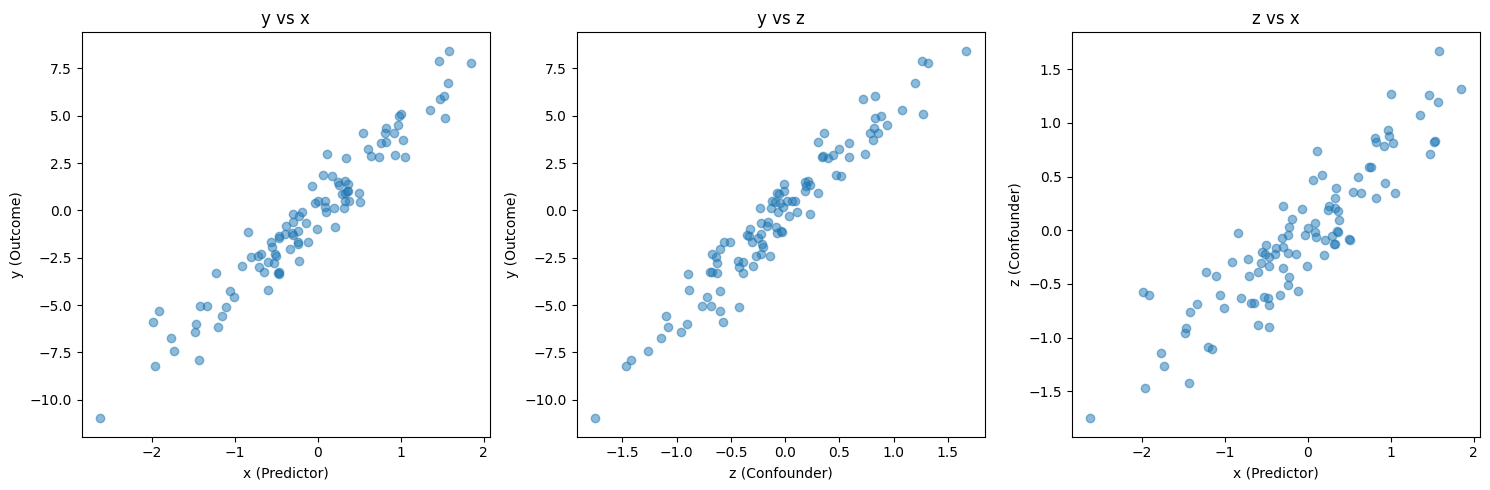

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
n = 100

# Generate data
x = np.random.normal(0, 1, n) # normally distributed values
z = 0.7*x + 0.3*np.random.normal(0, 1, n)  # confounder, linear in x with gaussian noise
y = 2*x + 3*z + np.random.normal(0, 0.5, n)  # outcome, linear in x and z with gaussian noise

# Create figure with plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot relationships
ax1.scatter(x, y, alpha=0.5) # plot y vs x
ax1.set_xlabel('x (Predictor)')
ax1.set_ylabel('y (Outcome)')
ax1.set_title('y vs x')

ax2.scatter(z, y, alpha=0.5) # plot y vs z
ax2.set_xlabel('z (Confounder)')
ax2.set_ylabel('y (Outcome)')
ax2.set_title('y vs z')

ax3.scatter(x, z, alpha=0.5) # plot z vs x
ax3.set_xlabel('x (Predictor)')
ax3.set_ylabel('z (Confounder)')
ax3.set_title('z vs x')

plt.tight_layout()

# Naive Analysis: regressing y on x directly
naive_model = stats.linregress(x, y) # linear regression of y on x
print("\nNaive Analysis (y ~ x):")
print(f"Coefficient: {naive_model.slope:.3f}") # slope is believed correlation
print(f"P-value: {naive_model.pvalue:.3e}") # confidence in correlation, lower is more confident

# Controlled Analysis
# Step 1: Get residuals of x after controlling for z
model_xz = stats.linregress(z, x) # linear regression of x on z
predicted_x = model_xz.slope * z + model_xz.intercept # predicted values of x based on z
residuals_x = x - predicted_x # residuals of x after removing effect of z

# Step 2: Get residuals of y after controlling for z
model_yz = stats.linregress(z, y) # linear regression of y on z
predicted_y = model_yz.slope * z + model_yz.intercept # predicted values of y based on z
residuals_y = y - predicted_y # residuals of y after removing effect of z

# Step 3: Regress residuals to get controlled effect
controlled_model = stats.linregress(residuals_x, residuals_y) # linear regression of residuals_y on residuals_x
print("\nControlled Analysis (accounting for z):") # this erases out the effect of z
print(f"Coefficient: {controlled_model.slope:.3f}")
print(f"P-value: {controlled_model.pvalue:.3e}")

<div style="background-color: #e8f5e9; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 3: Scree and BiPlot (10)



In this question you will explore scree and biplots. The code is given: comment it in detail to prove you totally understand what it does. Then, you will answer questions below. 


Feature loadings (scaled by singular values):
alcohol                  : PC1 = -4.1772, PC2 = -10.1965
malic_acid               : PC1 =  7.0962, PC2 = -4.7421
ash                      : PC1 =  0.0594, PC2 = -6.6634
alcalinity_of_ash        : PC1 =  6.9264, PC2 =  0.2233
magnesium                : PC1 = -4.1095, PC2 = -6.3170
total_phenols            : PC1 = -11.4223, PC2 = -1.3712
flavanoids               : PC1 = -12.2406, PC2 =  0.0708
nonflavanoid_phenols     : PC1 =  8.6402, PC2 = -0.6067
proanthocyanins          : PC1 = -9.0713, PC2 = -0.8286
color_intensity          : PC1 =  2.5647, PC2 = -11.1735
hue                      : PC1 = -8.5875, PC2 =  5.8869
od280/od315_of_diluted_wines: PC1 = -10.8871, PC2 =  3.4680
proline                  : PC1 = -8.2992, PC2 = -7.6930


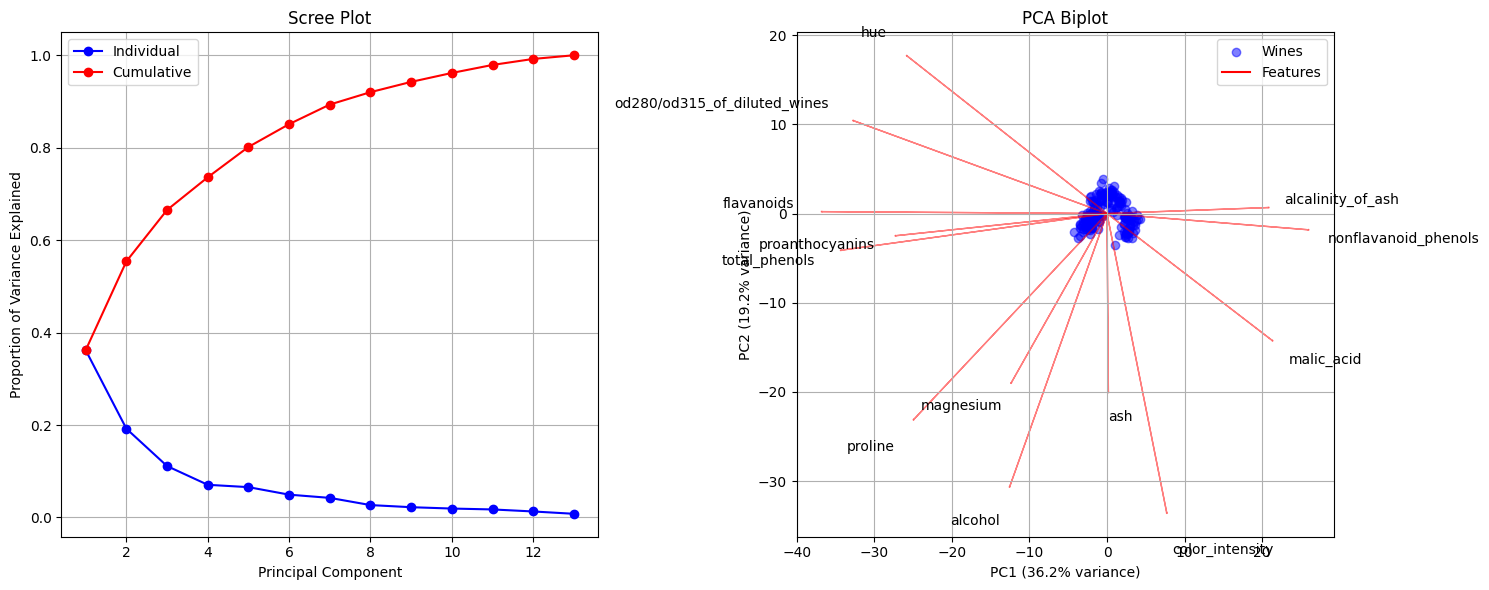

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load and prepare data
wine = load_wine() # load wine dataset
X = wine.data # feature data
X_scaled = StandardScaler().fit_transform(X) # standardize features via standard scaling

# Perform PCA
U, s, Vt = np.linalg.svd(X_scaled) # SVD decomposition of standardized data
V = Vt.T # transpose Vt to get V

# Create figure with both scree and biplot
fig = plt.figure(figsize=(15, 6))

# 1. Scree plot
plt.subplot(121)
var_exp = s**2 / np.sum(s**2) # variance explained by each principal component
cum_var_exp = np.cumsum(var_exp) # cumulative variance explained

plt.plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual') # plot individual variance explained
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative') # plot cumulative variance explained
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)

# 2. Biplot
plt.subplot(122)
scores = X_scaled @ V # pca scores, projection of data onto principal components
scale = 3  # Adjust this to change relative scaling of arrows

# Plot scores
plt.scatter(scores[:,0], scores[:,1], c='b', alpha=0.5, label='Wines')

# Plot loadings
for i, feature in enumerate(wine.feature_names): # iterate over features
    x = V[i,0] * s[0] * scale # scale by singular values
    y = V[i,1] * s[1] * scale # scale by singular values
    # Draw arrow for each feature based on loadings
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.1)
    
    # Add labels with offset based on quadrant
    if x >= 0:
        ha = 'left'
    else:
        ha = 'right'
    if y >= 0:
        va = 'bottom'
    else:
        va = 'top'
        
    plt.text(x*1.1, y*1.1, feature, ha=ha, va=va) # label features

plt.xlabel(f"PC1 ({var_exp[0]:.1%} variance)")
plt.ylabel(f"PC2 ({var_exp[1]:.1%} variance)")
plt.title('PCA Biplot')
plt.grid(True)

# Add legend
plt.plot([0], [0], 'r-', label='Features')
plt.legend()

plt.tight_layout()

# Print feature loadings for reference
print("\nFeature loadings (scaled by singular values):")
for name, v1, v2 in zip(wine.feature_names, 
                       V[:,0] * s[0], 
                       V[:,1] * s[1]):
    print(f"{name:25s}: PC1 = {v1:7.4f}, PC2 = {v2:7.4f}")

#### Scree Plot Analysis (4 points)
1. (2 pts) Using the scree plot:
   - How many components would you keep based on the "elbow" criterion?

   I would keep 3, maybe 4.

   - What is the cumulative variance explained by these components?

   Between 62.5-75.0%

2. (2 pts) Looking at the relationship between individual and cumulative variance:
   - What percentage of variance is explained by PC1 alone?

   36.2%

   - How much additional variance does PC2 capture?

   19.2%

   - Based on these numbers, justify whether using only PC1 would be sufficient.

   It would not be sufficient as you do not capture even half of the variance.

#### Biplot Interpretation (6 points)
3. (2 pts) Feature groupings:
   - Which features point in similar directions along PC1? 

   Proline, magnesium, and alcohol. Then, ash, color itensity, and malic acid (minorly). 

   - Find two features that point in nearly perpendicular directions. What does this suggest about their relationship?

   Proline and malic acid. This implies they are nearly uncorrelated.

4. (2 pts) Feature representation:
   - Identify two features that would be poorly represented if we only kept PC1.

   Ash and color intensity.
   
   - Explain why these features would be poorly represented (hint: look at their orientation).

   Becayse they point more strongly in the vertical direction (not PC1).

5. (2 pts) Chemical interpretation:
   - Based on which features align strongly with PC1, what chemical property seems to explain the most variation in wines?

   Flavanoids and alcalinity of ash. These control acidity, mouthfeel, and flavor of the wine.

   - Looking at PC2's strongest features, what might this second component represent chemically?

   The features are as listed in 4a. They control appearance and acidity.



For reference, the features are:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline

Note: In your answers, refer to specific features by name and support your interpretations with observations from the plots.

<div style="background-color: #e8f5e9; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 4: PCA Understanding (10)



Answer these questions in a markdown cell using equations where necessary:
1. When we use SVD, we use three matrices $U$, $\Sigma$ and $V$; when we work with the covariance matrix $C$, we often focus on $V$ - why is that? 
2. What are the eigenvectors of $C$? What are the eigenvalues?
3. What purpose does $U$ have? Do $V$ and $U$ have different purposes? If so, why? If not, why not? What purpose does $\Sigma$ have?
4. In what ways does the use of $C$, rather than just $X$ itself, inform us to the meanings of $U$ and $V$? 
5. Given PCA's focus on $C$, what does PCA reveal to us geometrically? 


1] If our data is $X$ then we can see (assuming the data is standardized),

$$
C\equiv X^TX=(U\Sigma V^T)^T(U\Sigma V)=V\Sigma U^TU\Sigma V^T=V\Sigma^2 V^T
$$

Where I have made use of the fact that $\Sigma$ is diagonal and $U$ is unitary. We see that the covariance matrix can be cast into a product of singular values and right singular vectors alone.

2] From the last relation we can see the eigenspace of $C$ depends on the eigenspaces of $V$ and $\Sigma^2$. That is, the eigenvectors of $C$ correspond to the eigenvectors of $V$ and $C$'s eigenvalues correspond to the square of the singular values.

3] $U$ represents the eigenspace of the rows of the original matrix, $X$. In data science this is often referred to as the "sample space". $V$ and $U$ do have different purposes as $V$ represents the eigenspace of the columns of the original matrix. In data science this is often referred to as the "feature space". They serve different purposes dues to the fact that $X$ may not be square. In the case that it is square, they are the same. The elements of $\Sigma$ correspond to how much variance is captured by the corresponding vectors in $U$ and $V$.

4] $C$ isolates $V$ itself which can support the notion of the separtion between either vector's use. Also, it makes explicit the connection between the right eigenvectors and the square of the singular values. This is in contrast to how SVD decomposes $X$ and shows how its "irregular" eigenspace transforms.

5] It shows us the best low dimenisonal representation of a higher dimensional system.

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 5: PCA Visualization (10)
</div>



#### Part 1: Data Preparation and SVD Basics
1. Load the Palmer Penguins dataset and prepare it:
   - Handle missing values
   - Select only numeric columns
   - Scale the data appropriately
   - Keep track of species for later coloring (next problem)

2. Perform SVD step by step using `linalg`:
   - Compute $U$, $\Sigma$, and $V^\mathsf{T}$ matrices
   - Visualize each matrix using heatmaps (be careful with the shape of $\Sigma$ that is returned; you will need the $\sigma_i$ and $\lambda_i$ below)
   - Explain what each matrix represents in terms of the penguins data

#### Part 2: Understanding Variance
1. Create and interpret scree plots:
   - Plot singular values
   - Calculate and plot explained variance ratios
   - Create cumulative variance plot
   - Identify "elbow" point
   - Justify how many components you would keep

</div>

1.1

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

penguins = sns.load_dataset("penguins").dropna()  # Load penguins dataset and drop missing values
penguins_species = penguins['species']
penguins_numerics = penguins.select_dtypes(include=[np.number])  # Select only numeric columns

penguins_scaled = StandardScaler().fit_transform(penguins_numerics)  # Standardize numeric features

1.2

Shapes of SVD components:
Data shape: (333, 4)
U shape: (333, 333)
S shape: (4,)
V shape: (4, 4)


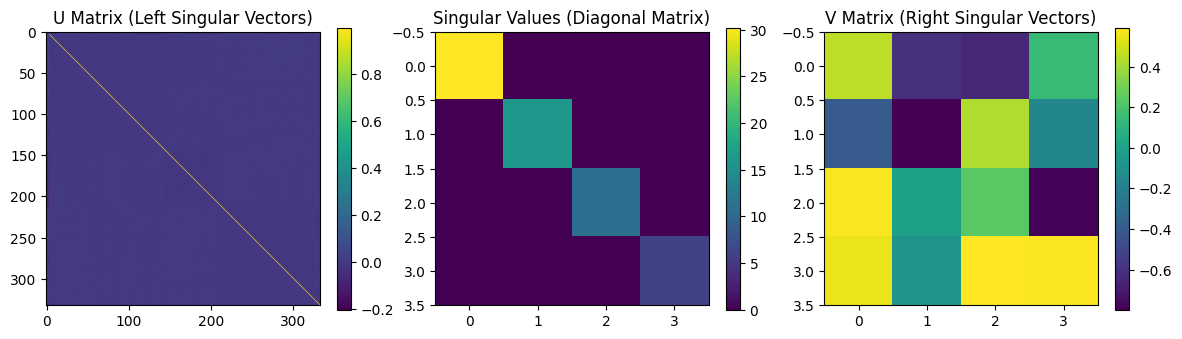

In [4]:
U, S, Vt = np.linalg.svd(penguins_scaled) # SVD decomposition of standardized data
V = Vt.T # transpose Vt to get V
print("Shapes of SVD components:")
print(f"Data shape: {penguins_scaled.shape}")  # Original data shape
print(f"U shape: {U.shape}")  # Left singular vectors
print(f"S shape: {S.shape}")  # Singular values
print(f"V shape: {V.shape}")  # Right singular vectors

fig,axs = plt.subplots(1,3,figsize=(12,5))

im0 = axs[0].imshow(U)
axs[0].set_title('U Matrix (Left Singular Vectors)')
fig.colorbar(im0, ax=axs[0],shrink=0.6)
im1 = axs[1].imshow(np.diag(S))
axs[1].set_title('Singular Values (Diagonal Matrix)')
fig.colorbar(im1, ax=axs[1],shrink=0.6)
im2 = axs[2].imshow(V)
axs[2].set_title('V Matrix (Right Singular Vectors)')
fig.colorbar(im2, ax=axs[2],shrink=0.6)
plt.tight_layout()

$U$ represents the sample space of the dataset, how each penguin relates to the feature directions described in $V$. Of course, in the form displayed there are columns which are not useful in the representation of the data. $\Sigma$ represents how each vector in either sets of matrices captures variation in the dataset. $V$ represents the feature space and each column is a principal direction. The elements of each column tell us how each feature contributes to that principle direction.

2.1

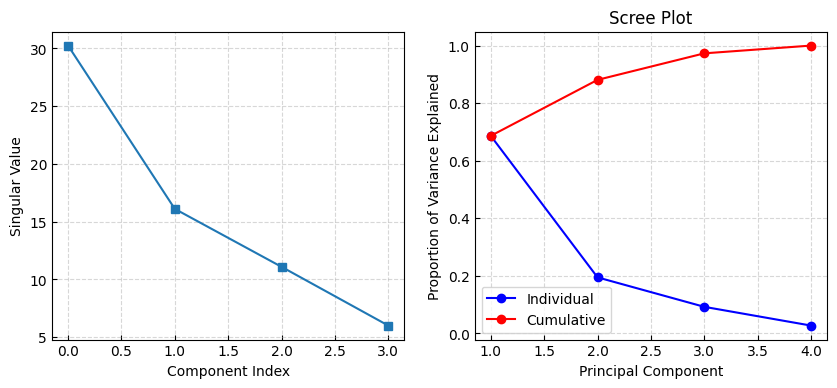

In [5]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
var_exp = S**2 / np.sum(S**2) # variance explained by each principal component
cum_var_exp = np.cumsum(var_exp) # cumulative variance explained

axs[0].plot(S,marker='s')
axs[0].set_xlabel('Component Index')
axs[0].set_ylabel('Singular Value')

axs[1].plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual') # plot individual variance explained
axs[1].plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative') # plot cumulative variance explained
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend()

for ax in axs :
    ax.grid(ls='--', alpha=0.5)
    ax.tick_params(direction='in')


I claim that the elbow point is at principal component 2 as there is a noticable "kink" at that point. I would keep up to that principal component because in addition to having the "kink" which is a good rule of thumb it also accounts for approximately 90% of the variance. True, principal component one accounts for approximately 70% of the variance but the inclusion of the second component provides advantageous coverage of the variance and a good contrast to principal component 1.

<div style="background-color: #e8f5e9; padding: 20px; border-radius: 10px; margin: 10px 0; max-width: 100%;">

## Problem 6: EDA/Visualization with PCA (10)
</div>


Using your Penguin dataset, perform the following analyses using only `linalg` and no canned libaries:

1. **Principal Component Selection**
   - Calculate eigenvalues for all components
   - Create a scree plot showing:
     * Individual variance explained
     * Cumulative variance explained
   - Apply Kaiser criterion ($\lambda > 1$); that is, add a horizontal line at the apprpriat height
   - Justify your choice of number of components (markdown)

2. **Score Plot Analysis**
   - Create PC1 vs PC2 scatter plot
   - Color points by class/category
   - Add 95% confidence ellipses for each class
   - Label axes with variance explained
   - Interpret the clustering patterns

3. **Loading Plot Analysis**
   - Plot feature loadings as vectors
   - Scale arrows by loading magnitude
   - Label features clearly
   - Identify which features contribute most to each PC (markdown)

4. **Biplot Integration**
   - Combine scores and loadings in one plot
   - Ensure proper scaling of both components
   - Add a clear legend distinguishing:
     * Observations (points)
     * Features (arrows)
     * Class boundaries (ellipses)

5. **Interpretation & Insights**
   - Explain relationships between:
     * Features (using loading angles)
     * Classes (using score positions)
     * Features and classes (using biplot)
   - Identify which features best distinguish classes
   - Note any surprising patterns or outliers (markdown)

**Deliverables:**
- All plots with clear labels and legends
- Brief explanations of your findings (markdown)
- Justification for component selection (markdown)
- Discussion of practical implications (markdown)

**Tips:**
- Standardize your data before PCA
- Use consistent colors across all plots
- Add grid lines for easier interpretation


1]

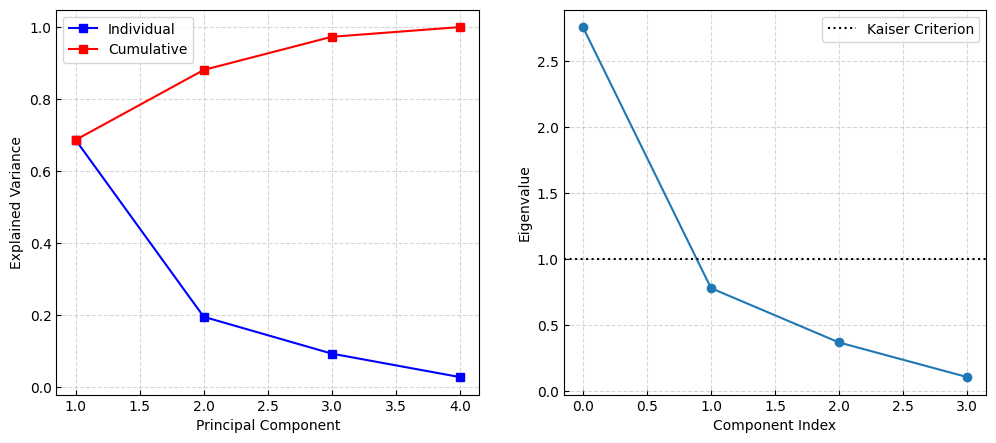

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

penguins = sns.load_dataset("penguins").dropna()  # Load penguins dataset and drop missing values
penguins_species = penguins['species']
penguins_numerics = penguins.select_dtypes(include=[np.number])  # Select only numeric columns

standard_scaler = lambda x: (x - np.mean(x, axis=0)) / np.std(x, axis=0)
penguins_scaled = standard_scaler(penguins_numerics.values)  # Standardize

left_penguins = penguins_scaled @ penguins_scaled.T  # Compute left singular vectors
right_penguins = penguins_scaled.T @ penguins_scaled  # Compute right singular vectors

covariance_matrix = np.dot(penguins_scaled.T, penguins_scaled) / (penguins_scaled.shape[0] - 1)
eigvals, eigvecs = np.linalg.eig(covariance_matrix)

order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order].real
eigvecs = eigvecs[:, order].real

explained_variance = eigvals / eigvals.sum()
cumulative_explained = np.cumsum(explained_variance)

fig,axs = plt.subplots(1,2,figsize=(12,5))

axs[0].plot(range(1, len(explained_variance) + 1), explained_variance, 'bs-', label='Individual')
axs[0].plot(range(1, len(cumulative_explained) + 1), cumulative_explained, 'rs-', label='Cumulative')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance')
axs[0].legend()

axs[1].plot(eigvals, marker='o')
axs[1].axhline(1, color='black', ls=':', label='Kaiser Criterion')
axs[1].set_xlabel('Component Index')
axs[1].set_ylabel('Eigenvalue')
axs[1].legend()

for ax in axs :
    ax.grid(ls='--', alpha=0.5)
    ax.tick_params(direction='in')

While the Kaiser criterion indicates we only take the first principal component I see that it's explained variance is near 70%. If we include the "elbow" (principal component 2) our variance goes to ~90%.

2]

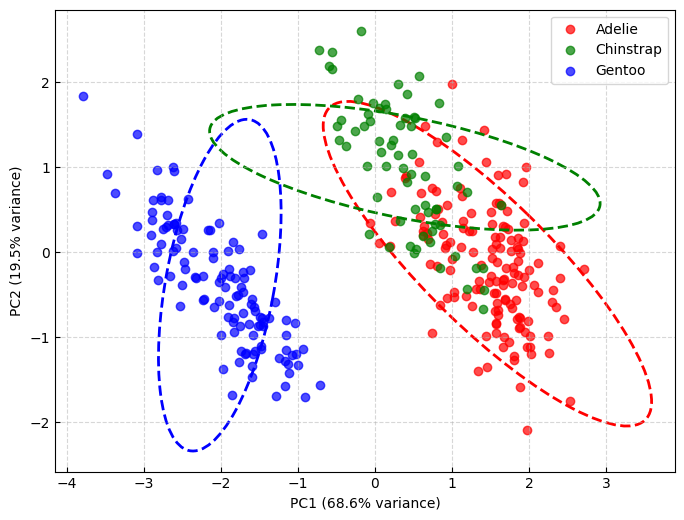

In [7]:
'''
take note, i wrote this as best i could and then asked chatgpt to help me fix 
it. find the best version in the next cell where i dropped this code into 
chatgpt 5.0 (11.11.2025) and asked it to help.
'''

from matplotlib.patches import Ellipse

scores = penguins_scaled @ eigvecs  # PCA scores
chi2_95_2df = 1.  # 95% quantile of chi-square with 2 DOF
# chi2_95_2df = 5.99  # 95% quantile of chi-square with 2 DOF
fig, ax = plt.subplots(figsize=(8,6))
species_unique = penguins_species.unique()
colors = ['r', 'g', 'b']
for species, color in zip(species_unique, colors):
    mask = penguins_species == species
    peng_mask = penguins_scaled[mask]
    peng_mask_mean = np.mean(peng_mask, axis=0)
    width, height = 2 * np.sqrt(chi2_95_2df) * eigvals[:2]
    angle = np.degrees(np.arctan2(eigvecs[1,0], eigvecs[0,0]))
    ellipse = Ellipse(xy=(np.mean(scores[mask,0]), np.mean(scores[mask,1])),
                      width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2, ls='--')
    ax.add_patch(ellipse)

    cov_mat = np.dot(scores[mask].T, scores[mask]) / (scores[mask].shape[0] - 1)
    eigvals, eigvecs = np.linalg.eig(cov_mat)
    ax.scatter(scores[mask, 0], scores[mask, 1], label=species, alpha=0.7, color=color)
ax.grid(ls='--', alpha=0.5)
ax.tick_params(direction='in')
ax.set_xlabel(f"PC1 ({explained_variance[0]:.1%} variance)")
ax.set_ylabel(f"PC2 ({explained_variance[1]:.1%} variance)")
ax.legend()

# center_x = 0
# center_y = 0
# width = 4  # Major or minor axis length
# height = 2 # Minor or major axis length
# angle = 125 # Rotation angle in degrees (counter-clockwise)

# # Create the Ellipse patch
# ellipse = Ellipse((center_x, center_y), width=width, height=height, angle=angle,
#                   facecolor='blue', alpha=0.5, edgecolor='black', linewidth=2)

# # Add the ellipse to the axes
# ax.add_patch(ellipse)

# plt.show()

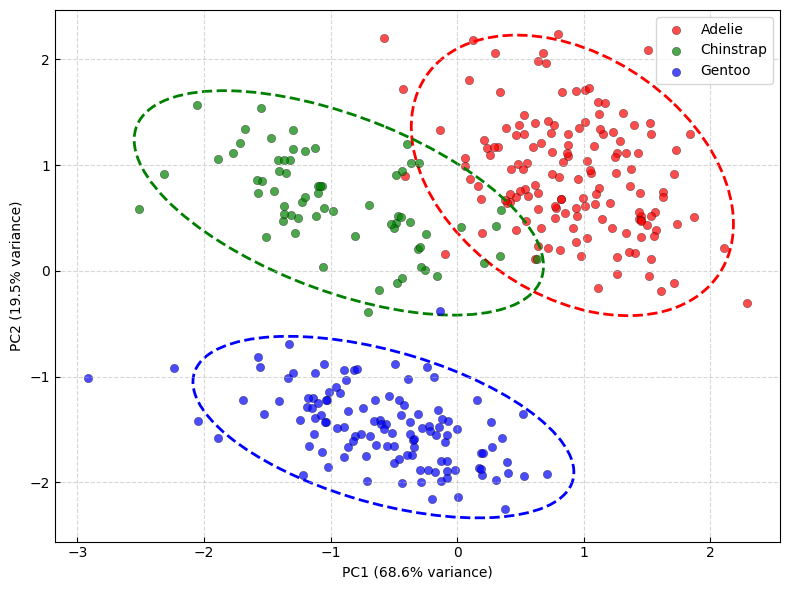

In [8]:
'''
this is output from chatgpt 5.0 (11.11.2025) after i asked it to help me fix the
 above code.
'''

from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt

scores = np.asarray(penguins_scaled @ eigvecs)  # PCA scores (ensure NumPy array)
chi2_95_2df = 5.991  # 95% quantile of chi-square with 2 DOF

fig, ax = plt.subplots(figsize=(8, 6))
species_unique = penguins_species.unique()
colors = ['r', 'g', 'b']
color_map = dict(zip(species_unique, colors))

for species, color in color_map.items():
    mask = penguins_species == species
    sc = scores[mask][:, :2]  # only PC1, PC2
    mean = sc.mean(axis=0)
    cov = np.cov(sc.T, ddof=1)
    # eigen-decomposition of within-class covariance
    eigvals_c, eigvecs_c = np.linalg.eigh(cov)
    order = eigvals_c.argsort()[::-1]
    eigvals_c = eigvals_c[order]
    eigvecs_c = eigvecs_c[:, order]
    # ellipse radii scaled by chi² quantile
    width = 2 * np.sqrt(eigvals_c[0] * chi2_95_2df)
    height = 2 * np.sqrt(eigvals_c[1] * chi2_95_2df)
    angle = np.degrees(np.arctan2(eigvecs_c[1, 0], eigvecs_c[0, 0]))
    # scatter + ellipse
    ax.scatter(sc[:, 0], sc[:, 1], label=species, alpha=0.7, color=color, edgecolor='k', linewidth=0.3)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, fc='none', lw=2, ls='--')
    ax.add_patch(ellipse)

ax.grid(ls='--', alpha=0.5)
ax.tick_params(direction='in')
ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.1f}% variance)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.1f}% variance)")
ax.legend()
plt.tight_layout()
plt.show()


Through PCA we can identify penguins based on their species quite nicely. There is some slight classification issues for Adelie and Chinstrap on their boundary but in whole, they are not entirely similar.

3]

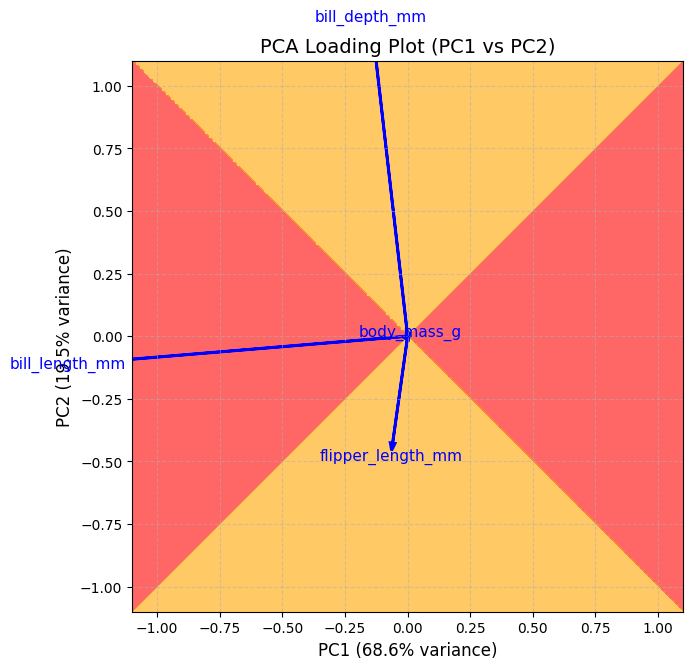

In [9]:

feature_names = penguins_numerics
loadings = eigvecs[:, :2]

arrow_scale = 1.3
# make a fine grid
x = np.linspace(-1.1, 1.1, 400)
y = np.linspace(-1.1, 1.1, 400)
X, Y = np.meshgrid(x, y)

# regions of dominance
region1 = np.abs(X) > np.abs(Y)   # PC1 dominates
region2 = np.abs(Y) > np.abs(X)   # PC2 dominates

fig, ax = plt.subplots(figsize=(7, 7))
ax.contourf(X, Y, region1, levels=[0.5, 1], colors=['red'], alpha=0.6)
ax.contourf(X, Y, region2, levels=[0.5, 1], colors=['orange'], alpha=0.6)
for i, feature in enumerate(feature_names):
    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, arrow_scale*x, arrow_scale*y,
             head_width=0.02, head_length=0.03,
             fc='blue', ec='blue', lw=2, length_includes_head=True)
    ax.text(arrow_scale*x*1.05, arrow_scale*y*1.05, feature,
            color='blue', ha='center', va='center', fontsize=11)

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.1f}% variance)", fontsize=12)
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.1f}% variance)", fontsize=12)
ax.set_title("PCA Loading Plot (PC1 vs PC2)", fontsize=14)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal', 'box')
ax.grid(ls='--', alpha=0.5)
plt.tight_layout()


via my coloring of the plot we can see

PC1 dominate features : 

body mass

PC2 dominate features :

bill length, flipper length, and bill depth.

4] This problem gives me the sense that I am to blend the last two problems into one plot. I will judicisouly decide to use ChatGPT 5.0 (11.11.25) to streamline this process.

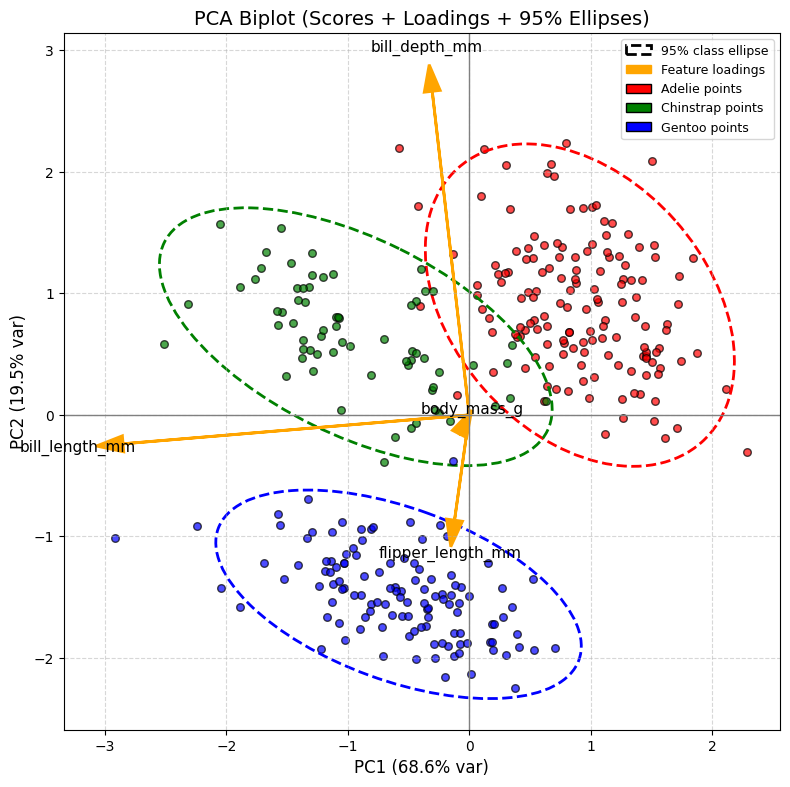

In [10]:
from matplotlib.patches import Ellipse, Patch
import numpy as np
import matplotlib.pyplot as plt

scores = np.asarray(penguins_scaled @ eigvecs)
loadings = eigvecs[:, :2]
feature_names = penguins_numerics

score_max = np.max(np.abs(scores[:, :2]))+ 1.5
loading_scale = score_max * 0.7 

chi2_95_2df = 5.991
species_unique = penguins_species.unique()
colors = ['r', 'g', 'b']
color_map = dict(zip(species_unique, colors))

fig, ax = plt.subplots(figsize=(8, 8))

for species, color in color_map.items():
    mask = penguins_species == species
    sc = scores[mask][:, :2]
    mean = sc.mean(axis=0)
    cov = np.cov(sc.T, ddof=1)
    eigvals_c, eigvecs_c = np.linalg.eigh(cov)
    order = eigvals_c.argsort()[::-1]
    eigvals_c = eigvals_c[order]
    eigvecs_c = eigvecs_c[:, order]
    width = 2 * np.sqrt(eigvals_c[0] * chi2_95_2df)
    height = 2 * np.sqrt(eigvals_c[1] * chi2_95_2df)
    angle = np.degrees(np.arctan2(eigvecs_c[1, 0], eigvecs_c[0, 0]))
    ax.scatter(sc[:, 0], sc[:, 1], color=color, label=f"{species} points", alpha=0.7, edgecolor='k', s=30)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, fc='none', lw=2, ls='--')
    ax.add_patch(ellipse)

for i, feature in enumerate(feature_names):
    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, loading_scale*x, loading_scale*y,
             head_width=score_max*0.03, head_length=score_max*0.05,
             fc='orange', ec='orange', lw=2, length_includes_head=True)
    ax.text(loading_scale*x*1.05, loading_scale*y*1.05, feature,
            color='black', ha='center', va='center', fontsize=11)

ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.1f}% var)", fontsize=12)
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.1f}% var)", fontsize=12)
ax.set_title("PCA Biplot (Scores + Loadings + 95% Ellipses)", fontsize=14)
ax.set_aspect('equal', 'box')
ax.grid(ls='--', alpha=0.5)

legend_elements = [
    Patch(facecolor='none', edgecolor='k', lw=2, ls='--', label='95% class ellipse'),
    Patch(facecolor='orange', edgecolor='orange', label='Feature loadings'),
]
for species, color in color_map.items():
    legend_elements.append(Patch(facecolor=color, edgecolor='k', label=f'{species} points'))

ax.legend(handles=legend_elements, loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()


5. **Interpretation & Insights**
   - Explain relationships between:
     * Features (using loading angles)
     * Classes (using score positions)
     * Features and classes (using biplot)
   - Identify which features best distinguish classes
   - Note any surprising patterns or outliers (markdown)

5. **Interpretation & Insights**
   - Explain relationships between:
     * Features (using loading angles)

         flipper and bill length are tightly correlated and are both anticorrelated with body mass. body mass and bill depth are nearly uncorelated which implies (and is seen graphically) that flipper and bill length are also not strongly correlated with bill depth.

     * Classes (using score positions)

         Penguins are identifiable from their species. There lies slight issue in identifying Adelie and Chinstrap penguins in their minimal overlap region.

     * Features and classes (using biplot)

      the classes all seem to lie strongly with bill depth as they show stretching along that direction. There seems to be some connection between flipper and bill length with the chinstrap penguins. The Gentoo penguins seem to "ride the fence" when it comes to showing strong correlation with the remaining features.

   - Identify which features best distinguish classes

        flipper length, bill length, and bill depth

   - Note any surprising patterns or outliers (markdown)

   There is a Gentoo penguin that lies within adelie penguin classification. This may be an indication of a faulty calculation or perhaps failure of the method.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.